In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
# Carregando o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalizando os dados de pixel para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convertendo os rótulos para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# # Criando o modelo CNN
# model = Sequential()

# # Adicionando a primeira camada convolucional
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# #conv1_output = model.predict(x_train)

# # Adicionando a camada de pooling
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adicionando a segunda camada convolucional
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

# # Adicionando outra camada de pooling
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adicionando camada de dropout
# model.add(Dropout(0.25))

# # Transformando os mapas de características em um vetor unidimensional
# model.add(Flatten())

# # Adicionando uma camada densa (fully connected)
# model.add(Dense(128, activation='relu'))

# # Adicionando a camada de saída
# model.add(Dense(10, activation='softmax'))

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [9]:
# Treinando o modelo
historico = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.4266 - accuracy: 0.4835 - val_loss: 1.0470 - val_accuracy: 0.6287
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9994 - accuracy: 0.6475 - val_loss: 0.8249 - val_accuracy: 0.7119
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8543 - accuracy: 0.7006 - val_loss: 0.7793 - val_accuracy: 0.7292
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7696 - accuracy: 0.7299 - val_loss: 0.7271 - val_accuracy: 0.7468
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7102 - accuracy: 0.7506 - val_loss: 0.7056 - val_accuracy: 0.7529
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6564 - accuracy: 0.7684 - val_loss: 0.7046 - val_accuracy: 0.7586
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6158 - accuracy: 0.7827 - val_loss: 0.6900 - val_accu

In [10]:
# Obtenção das previsões 
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

313/313 [==============================] - 1s 3ms/step


In [11]:
accuracy_score(y_test, y_pred)

0.7363

In [12]:
# Avaliando o modelo no conjunto de testes
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Acurácia no conjunto de testes:', test_acc)

313/313 - 1s - loss: 0.6778 - accuracy: 0.7795 - 1s/epoch - 4ms/step
Acurácia no conjunto de testes: 0.7795000076293945


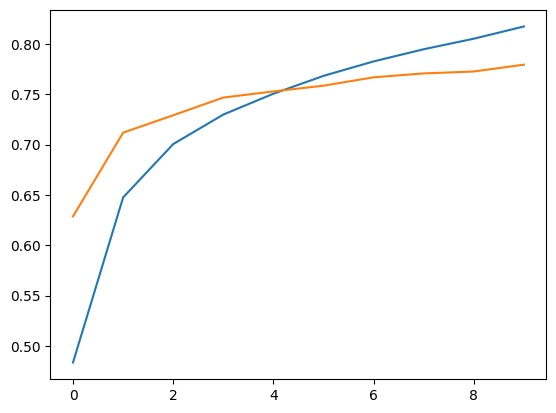

In [13]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['accuracy'])
#performance da rede
plt.plot(historico.history['val_accuracy'])